In [43]:
import csv, sqlite3, matplotlib
import pandas as pd
from pandas import DataFrame, Series
from collections import defaultdict

In [2]:
data1 = pd.read_csv('co-est2019-alldata.csv')
data2 = pd.read_csv('COVID-19_Historical_Data_Table.csv')

In [3]:
#columns: dates, FIPS, county name, number of tests per capita
#rows: counties

In [4]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        

dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    tests_per_count = (data2["NEGATIVE"][i] + data2["POSITIVE"][i])/dict3[county]
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "tests per capita": tests_per_count}
    list1.append(dict4)

In [5]:
df = DataFrame(list1)
df.head()

,Date,FIPS,county,tests per capita
0,2020/03/15,55000,Wisconsin,0.000059
1,2020/03/15,55001,Adams County,NaN
2,2020/03/15,55003,Ashland County,NaN
3,2020/03/15,55005,Barron County,NaN
4,2020/03/15,55007,Bayfield County,NaN


In [6]:
#df.to_csv('final.csv', index=False, encoding='utf-8')

In [7]:
#columns: FIPS, county, dates: number of tests per capita
#rows: counties(73)

In [8]:
a = df.pivot(index = "county", columns = "Date", values = "tests per capita")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)

In [9]:
result = pd.concat([b, a], axis = 1, sort = False)
r = result.reset_index()
r.pop("index")
r.head()

,FIPS,county,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,2020/03/22,...,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12
0,55000,Wisconsin,0.000059,0.000095,0.000191,0.000289,0.000403,0.000629,0.000843,0.001135,...,0.014764,0.015235,0.015892,0.016613,0.017561,0.018352,0.019214,0.019817,0.020344,0.021187
1,55001,Adams County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009001,0.009743,0.010138,0.010880,0.011919,0.012512,0.013007,0.013501,0.014639,0.015282
2,55003,Ashland County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009253,0.009639,0.009832,0.010796,0.010860,0.010988,0.011053,0.017286,0.017478,0.017800
3,55005,Barron County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017461,0.017461,0.018323,0.019958,0.021771,0.022633,0.023495,0.023694,0.023672,0.025020
4,55007,Bayfield County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013301,0.013567,0.013900,0.014432,0.014499,0.014698,0.015430,0.018356,0.018688,0.019287


In [44]:
%matplotlib inline 

Text(0, 0.5, 'tests per capita')

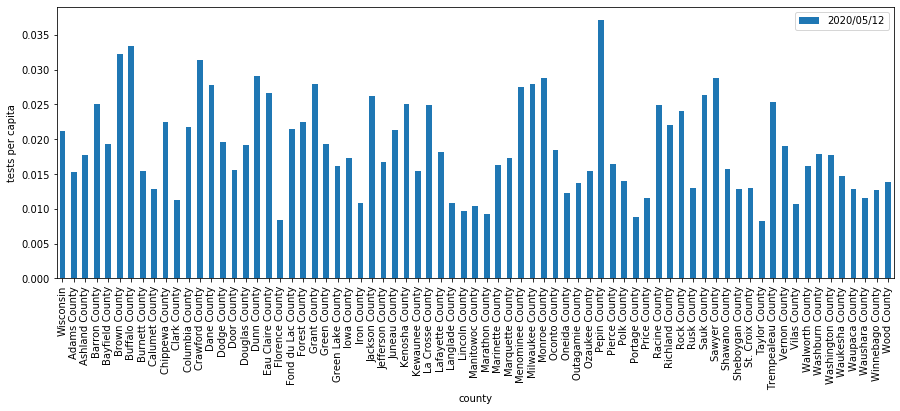

In [46]:
# tests per capita of all counties for a single date (in this case 2020/05/12)

a = r[["county","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5))
a.set_ylabel("tests per capita")

Text(0, 0.5, 'tests per capita')

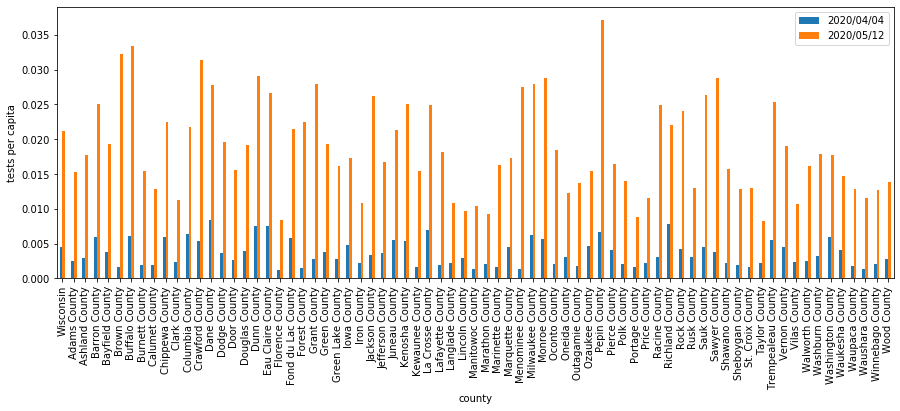

In [84]:
# tests per capita of all counties comparing that of two dates

a = r[["county","2020/04/04","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5))
a.set_ylabel("tests per capita")

Text(0.5, 1.0, 'Wisconsin')

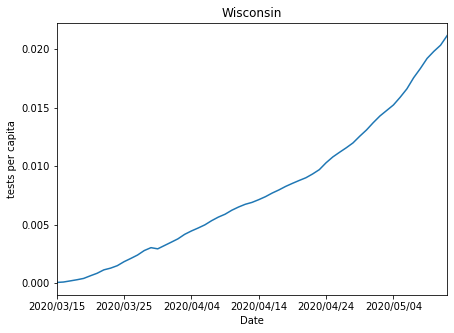

In [72]:
# tests per capita of a single county on all the dates (county in this case is Wisconsin Total)

a = r.loc[0][2:].plot(figsize = (7,5))   #plotting only Wisconsin data
a.set_xlabel("Date")
a.set_ylabel("tests per capita")
a.set_title("Wisconsin")

Text(0.5, 1.0, 'Wisconsin')

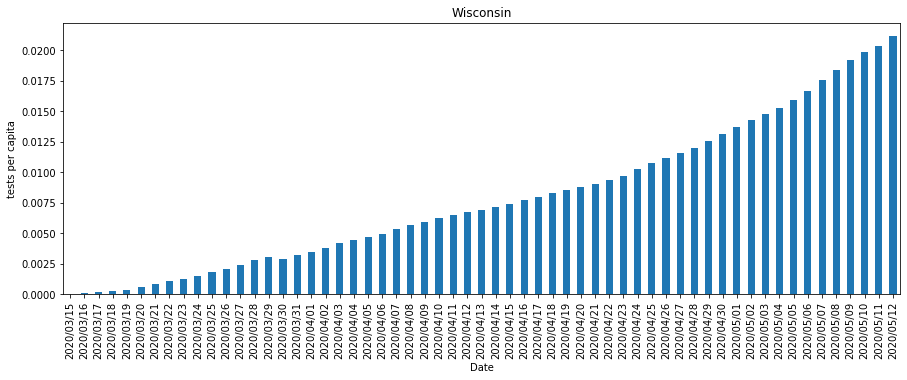

In [62]:
#same plot as above but a bar plot in this case

a = r.loc[0][2:].plot(kind ="bar", figsize = (15,5))   #plotting only Wisconsin data
a.set_xlabel("Date")
a.set_ylabel("tests per capita")
a.set_title("Wisconsin")

Text(0.5, 1.0, 'All Counties')

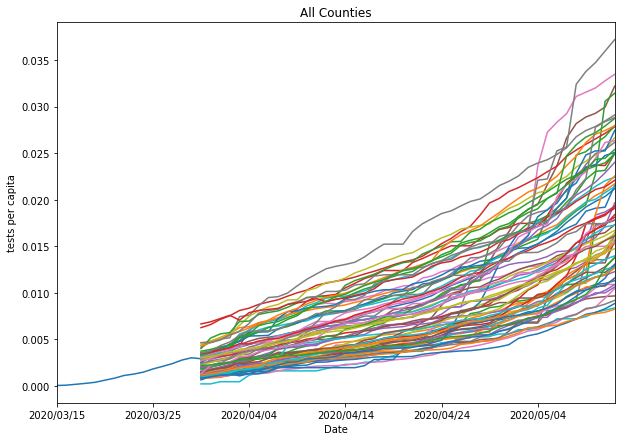

In [70]:
# tests per capita of all counties on all the dates

a = None
for i in range(len(r)):
    a = r.loc[i][2:].plot(figsize=(10,7))
    
a.set_xlabel("Date")
a.set_ylabel("tests per capita")
a.set_title("All Counties")